# Reading and exploring NWB data from DANDI

This tutorial will demonstrate how to download, explore, and do basic visualizations with
an NWB File from DANDI.

**Our goals are to learn how to:**
- Download data from the [DANDI archive](https://gui.dandiarchive.org/)
- Read and explore an NWB file
- Do basic visualizations of NWB data
- Stream data from the [DANDI archive](https://gui.dandiarchive.org/)



## Import libraries

Before we get started, let's import a few libraries that we will use for accessing and visualizing the data. 

If you *are not* running this notebook on DANDI Hub, you will first need to install these packages using `pip` or your favorite Python package manager. For example:
```
pip install dandi pynwb remfile matplotlib
```

If you *are* running this notebook on DANDI Hub, all packages should be pre-installed except for `remfile`. We can install this package using the command below:

In [1]:
!pip install remfile

In [2]:
import h5py
import pathlib
import remfile
import matplotlib.pyplot as plt
import numpy as np

from dandi.download import download
from dandi.dandiapi import DandiAPIClient
from pynwb import NWBHDF5IO

Matplotlib is building the font cache; this may take a moment.


# Downloading data from the DANDI archive

In this notebook we will be working with NWB data from one session of an experiment by
[Chandravadia et al. (2020)](https://www.nature.com/articles/s41597-020-0415-9). In this study,
the authors recorded single neuron activity from the medial temporal lobes of human subjects
while they performed a recognition memory task. This data can be found on the [DANDI Archive](https://gui.dandiarchive.org/) in [Dandiset 000004](https://gui.dandiarchive.org/dandiset/000004).


There are multiple ways to download data from DANDI:
1.  Dowloading data using the DANDI Web UI
2.  Downloading data programmatically

## 1. Downloading data using the DANDI Web UI
You can download files directly from the DANDI website.

1. Go to dataset [000004](https://gui.dandiarchive.org/dandiset/000004) on the DANDI archive.
2. List the files in this dataset by clicking the "Files" button in Dandiset Actions (top right column of the page).

<img src="https://pynwb.readthedocs.io/en/latest/_images/demo_dandi_view_files_in_dataset.png" width="700" alt="view files on dandi" align="center">

3. Choose the folder "sub-P11MHM" by clicking on its name.

<img src="https://pynwb.readthedocs.io/en/latest/_images/demo_dandi_select_folder.png" width="700" alt="selecting a folder on dandi" align="center">

4. Download the NWB data file "sub-P11HMH_ses-20061101_ecephys+image.nwb" to your
computer by clicking on the download symbol.

<img src="https://pynwb.readthedocs.io/en/latest/_images/demo_dandi_download_data.png" width="700" alt="selecting a folder on dandi" align="center">




## 2. Downloading data programmatically
Alternatively, you can download data using the `DandiAPIClient` from the `dandi` Python package. Using the dandiset id and file path, we can use the dandi api to download the NWB file.

You can learn more about the dandi API in the [DANDI Python API docs](https://dandi.readthedocs.io/en/stable/modref/index.html).

In [3]:
dandiset_id = '000004'
filepath = 'sub-P11HMH/sub-P11HMH_ses-20061101_ecephys+image.nwb'
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id)
    asset = dandiset.get_asset_by_path(filepath)
    download(asset.download_url, '.')

PATH                                      SIZE     DONE    DONE% CHECKSUM STATUS  MESSAGE          
sub-P11HMH_ses-20061101_ecephys+image.nwb                                 error   FileExistsError  
Summary:                                  0 Bytes  0 Bytes                1 error 1 FileExistsError
                                          +72.6 MB 0.00%                                           


In [4]:
asset.download_url

'https://api.dandiarchive.org/api/dandisets/000004/versions/0.220126.1852/assets/0f57f0b0-f021-42bb-8eaa-56cd482e2a29/download/'

# Reading and Exploring an NWB file

An [NWBFile](https://pynwb.readthedocs.io/en/latest/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment.
It contains all the data of that session and the metadata required to understand the data.


## Reading the NWB file
Reading and writing NWB data is carried out using the `NWBHDF5IO` class.
`NWBHDF5IO` reads and writes NWB data that is in the [HDF5](https://www.hdfgroup.org/solutions/hdf5/)
storage format, a popular, hierarchical format for storing large-scale scientific data.

### Using the NWBHDF5IO read method
The first argument to the constructor of `NWBHDF5IO` is the ``file_path``. Use the ``read`` method to read the data into a `NWBFile` object.

In [5]:
# Open the file in read mode "r",
filepath = "sub-P11HMH_ses-20061101_ecephys+image.nwb"
io = NWBHDF5IO(filepath, mode="r")
nwbfile = io.read()

You can print the `NWBFile` object in a Jupyter notebook to get a simplified, interactive representation of the contents of the NWB file.

In [6]:
nwbfile

root pynwb.file.NWBFile at 0x5490178768
Fields:
  acquisition: {
    events <class 'pynwb.misc.AnnotationSeries'>,
    experiment_ids <class 'pynwb.base.TimeSeries'>
  }
  data_collection: learning: 80, recognition: 81
  devices: {
    Neuralynx-cheetah <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    Neuralynx-cheetah-microwires-19 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-21 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-22 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-3 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-4 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-6 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-7 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-8 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: The data contained within this file describes a new/old recogntion task performed in patients with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human Medical Temporal Lobe (MTL).
  file_create_date: [datetime.datetime(2020, 5, 26, 19, 8, 31, 224415, tzinfo=tzoffset(None, -25200))]
  identifier: H11_9
  institution: Hunigton Memorial Hospital
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (7,), type "|O">
  lab: Rutishauser
  related_publications: ['Faraut et al. 2018, Scientific Data; Rutishauser et al. 2015, Nat Neurosci;']
  session_description: New/Old recognition task for ID: 9. 
  session_start_time: 2006-11-01 00:00:00-07:00
  stimulus: {
    StimulusPresentation <class 'pynwb.image.OpticalSeries'>
  }
  subject: subject pynwb.file.Subject at 0x5502528608
Fields:
  age: 16
  description: Right Lateral Frontal
  sex: M
  species: Human
  subject_id: P11HMH

  timestamps_reference_time: 2006-11-01 00:00:00-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

### Using NWBHDF5IO as a context manager
`NWBHDF5IO` can also be used as a context manager.

The advantage of using a context manager is that the file is closed automatically when the context finishes
successfully or if there is an error. Be aware that if you use this method, closing the context (unindenting the code) will automatically close the `NWBHDF5IO` object and the corresponding h5py File object. The data not already read from the NWB file will then be inaccessible, so any code that reads data must be placed within the context.



In [7]:
with NWBHDF5IO(filepath, mode="r") as io2:
    nwbfile2 = io2.read()

    # data accessible here

# data not accessible here

## Exploring the NWB file contents

### Accessing subject data

Access `nwbfile.subject` to get information about the subject used in this experiment, including their age, sex, species, and ID.

In [8]:
nwbfile.subject

subject pynwb.file.Subject at 0x5502528608
Fields:
  age: 16
  description: Right Lateral Frontal
  sex: M
  species: Human
  subject_id: P11HMH

### Accessing stimulus data

Data representing stimuli that were presented to the experimental subject are stored in
`stimulus` within the `NWBFile` object.


In [9]:
nwbfile.stimulus

{'StimulusPresentation': StimulusPresentation pynwb.image.OpticalSeries at 0x5502228224
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (200, 400, 300, 3), type "|u1">
   description: no description
   dimension: <HDF5 dataset "dimension": shape (3,), type "<i4">
   distance: 0.7
   field_of_view: <HDF5 dataset "field_of_view": shape (3,), type "<f8">
   format: raw
   interval: 1
   offset: 0.0
   orientation: lower left
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (200,), type "<f8">
   timestamps_unit: seconds
   unit: meters}

``NWBFile.stimulus`` is a dictionary that can contain PyNWB objects representing
different types of data, such as images (grayscale, RGB) or time series of images.
In this file, ``NWBFile.stimulus`` contains a single key "StimulusPresentation" with an
`OpticalSeries` object representing what images were shown to the subject and at what times.



In [10]:
stimulus_presentation = nwbfile.stimulus["StimulusPresentation"]
stimulus_presentation

StimulusPresentation pynwb.image.OpticalSeries at 0x5502228224
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (200, 400, 300, 3), type "|u1">
  description: no description
  dimension: <HDF5 dataset "dimension": shape (3,), type "<i4">
  distance: 0.7
  field_of_view: <HDF5 dataset "field_of_view": shape (3,), type "<f8">
  format: raw
  interval: 1
  offset: 0.0
  orientation: lower left
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (200,), type "<f8">
  timestamps_unit: seconds
  unit: meters

## Lazy loading of datasets
Data arrays are read passively from the NWB file.
Accessing the `data` attribute of the `OpticalSeries` object does not read the data values, but presents an `h5py.Dataset` object that can be indexed to read data.
You can use the ``[:]`` operator to read the entire data array into memory.



In [11]:
stimulus_presentation.data

<HDF5 dataset "data": shape (200, 400, 300, 3), type "|u1">

In [12]:
all_stimulus_data = stimulus_presentation.data[:]
all_stimulus_data

array([[[[233, 251, 250],
         [236, 253, 252],
         [241, 255, 254],
         ...,
         [169, 238, 221],
         [168, 239, 219],
         [166, 237, 217]],

        [[234, 252, 251],
         [236, 254, 253],
         [241, 255, 255],
         ...,
         [161, 226, 213],
         [158, 226, 210],
         [162, 229, 212]],

        [[232, 252, 250],
         [236, 253, 253],
         [240, 255, 255],
         ...,
         [165, 225, 217],
         [170, 232, 221],
         [167, 228, 216]],

        ...,

        [[138, 253, 233],
         [138, 253, 233],
         [140, 253, 233],
         ...,
         [118, 125, 158],
         [ 44,  49,  82],
         [ 10,  11,  41]],

        [[139, 254, 234],
         [139, 254, 234],
         [141, 254, 234],
         ...,
         [123, 133, 166],
         [ 64,  71, 104],
         [ 25,  28,  62]],

        [[139, 254, 234],
         [139, 254, 234],
         [141, 254, 234],
         ...,
         [128, 138, 170],
        

Images may be 3D or 4D (grayscale or RGB), where the first dimension must be time (frame).
The second and third dimensions represent x and y.
The fourth dimension represents the RGB value (length of 3) for color images.

This `OpticalSeries` data contains 200 images of size 400x300 pixels with three channels
(red, green, and blue).

In [13]:
stimulus_presentation.data.shape

(200, 400, 300, 3)

## Slicing datasets
Especially with very large datasets, it is often preferable to read only a portion of the data. To do this, index or slice into the ``data`` attribute just like if you were indexing or slicing a numpy array.

For example, let's look at a single image of the stimulus presentation data:


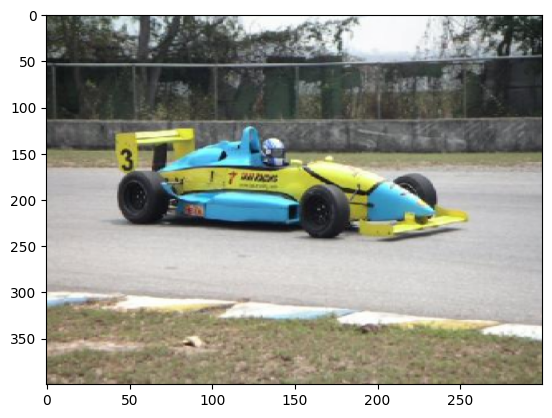

In [14]:
frame_index = 31
image = stimulus_presentation.data[frame_index]
image = image[..., ::-1] # Reverse the last dimension because the data were stored in BGR instead of RGB
plt.imshow(image, aspect="auto")

# Visualizing NWB Data

## Accessing single unit data
Data and metadata about sorted single units are stored in a `Units`
object. It stores metadata about each single unit in a tabular form, where each row represents
a unit with spike times and additional metadata.

In [15]:
nwbfile.units

,origClusterID,waveform_mean_encoding,waveform_mean_recognition,IsolationDist,SNR,waveform_mean_sampling_rate,spike_times,electrodes
id,,,,,,,,
0,1102,"[4.018883149441902, 5.896767433272135, 6.277246736454119, 5.431975982077304, 3.8770681391092783, 2.4546669300628188, 1.7111231685650992, 1.7369680526439102, 2.226307252365844, 2.702073717129048, 2.782513678017329, 2.358633874094165, 1.6097109615873464, 0.8710828531792982, 0.43974141968217334, 0.42460146744738037, 0.7135138632737544, 1.0609621666935902, 1.2369718291311778, 1.1515249402638867, 0.890132515408403, 0.6497702453574656, 0.6189683677297895, 0.8722230399877956, 1.335185199589462, 1.833855098612335, 2.193985270394992, 2.3319642996916565, 2.287621045057279, 2.185177968088822, 2.149433512900832, 2.2272765264583456, 2.3582860218241746, 2.407894396205811, 2.2407563270494646, 1.7908787290002421, 1.0895847095310016, 0.23842665796943105, -0.6541360231339399, -1.5342308910972635, -2.427470835944029, -3.4151959076287284, -4.578240891303991, -5.941960696717651, -7.47000656194889, -9.00487364465439, -10.438943336733699, -11.713673927185924, -12.836505499421309, -13.85961895886385, -14.834586309521322, -15.77022063554369, -16.618054249459124, -17.29315408572588, -17.717535637921085, -17.86107142261333, -17.75721065572435, -17.48602560257726, -17.135874590063533, -16.76648010897854, -16.394233324572387, -16.00678882767047, -15.596868926202996, -15.19458529786143, -14.879268217400707, -14.76425633210283, -14.963741892295099, -15.560512447449279, -16.591984778979597, -18.060633275556324, -19.960687631773705, -22.304090314715282, -25.129999875717495, -28.49238456140248, -32.433174060893975, -36.95649172369192, -42.018284239781856, -47.5363273915551, -53.413856154691956, -59.562787030083506, -65.9136292100723, -72.40765585148043, -78.97749277517697, -85.52878574839475, -91.9344885054869, -98.04559416542993, -103.71258486729157, -108.80608355111572, -113.22629455186652, -116.89781815203715, -119.75497330948171, -121.72785267176911, -122.73822025131814, -122.70803283970467, -122.6061568629708, -121.04066011001208, -118.34414848023327, -114.53809666911533, -109.66443331112981, -103.77369044499052, ...]","[8.000045061307883, 10.073790843880522, 10.199355530062219, 8.92208057568135, 6.981416689954849, 5.372255133816067, 4.693249080030427, 4.98446960054179, 5.828975063792222, 6.6405866880574616, 6.981893390542282, 6.759258548814399, 6.217741072085166, 5.7650643173169955, 5.734994428053802, 6.218389919805304, 7.041421341706132, 7.8858943227835825, 8.472953137464785, 8.705939505596046, 8.69994186790075, 8.692908537254166, 8.897362497107483, 9.378733151276133, 10.024613695802762, 10.614405246820066, 10.943105630994422, 10.926838595801486, 10.633238760062266, 10.225520484972582, 9.857706620857003, 9.583031879336046, 9.325998047667651, 8.929699649347922, 8.247205744574908, 7.223081508332884, 5.919989873516446, 4.478868898799423, 3.039177939403373, 1.666577157534888, 0.32841461063908484, -0.9720922901164927, -2.540980727277608, -4.363521421609343, -6.313904676796966, -8.209000483332908, -9.8906218848638, -11.291137914494472, -12.448001692123214, -13.462174384589591, -14.426448901433682, -15.364971743448503, -16.216975590292147, -16.87152335636797, -17.231356858124318, -17.26887656129104, -17.04361252846928, -16.67368163246737, -16.279852355228638, -15.935129481522528, -15.64778134683875, -15.385248538046024, -15.122743702994997, -14.887100724836891, -14.77054651678746, -14.907355915658387, -15.42773036543718, -16.415416995408847, -17.892088249039364, -19.835096136925063, -22.215879902417477, -25.03520812358167, -28.334503960061785, -32.17729077994401, -36.61228290401681, -41.639703608325576, -47.19964928640651, -53.187940873029106, -59.48908660029098, -66.00689772093979, -72.67581642507122, -79.4481079224174, -86.26631846136725, -93.03851930827886, -99.63148865918441, -105.88601702366319, -111.64569179805021, -116.78328845359991, -121.21113025895785, -124.87169274308154, -127.71621258169148, -129.68

We can view the single unit data as a pandas `DataFrame`.



In [16]:
units_df = nwbfile.units.to_dataframe()
units_df.head()

,origClusterID,waveform_mean_encoding,waveform_mean_recognition,IsolationDist,SNR,waveform_mean_sampling_rate,spike_times,electrodes
id,,,,,,,,
0,1102,"[4.018883149441902, 5.896767433272135, 6.27724...","[8.000045061307883, 10.073790843880522, 10.199...",11.291718,1.440666,[98400.0],"[5932.811644, 6081.077044, 6091.982364, 6093.1...",x y z imp location ...
1,1172,"[18.563049885034353, 21.19324494574446, 22.401...","[14.293816754040822, 16.663642031180412, 17.93...",1127.057965,1.752807,[98400.0],"[5932.499684, 5932.996044, 5934.152524, 5934.7...",x y z imp location ...
2,1192,"[-4.13895469721813, -5.240674392157537, -5.465...","[-1.8190292764526959, -2.721747652455219, -3.3...",20.535532,1.431687,[98400.0],"[5932.363124, 6079.039444, 6080.817844, 6083.1...",x y z imp location ...
3,1218,"[-18.250031869613768, -20.816355317271896, -21...","[-16.681364481563907, -19.135737449481013, -20...",804.779154,1.672149,[98400.0],"[5932.154284, 5932.205764, 5935.794204, 6075.6...",x y z imp location ...
4,2017,"[-7.009145964385704, -8.32920965742021, -8.098...","[0.23215033352949355, -1.4792817502708107, -2....",53.676326,1.401921,[98400.0],"[5933.886604, 5933.895124, 6082.117284, 6083.7...",x y z imp location ...


To access the spike times of the first single unit, index this pandas dataframe with the column name, “spike_times”, and the row index, 0. All times in NWB are stored in seconds relative to the session start time.

In [17]:
units_df["spike_times"][0]

array([5932.811644, 6081.077044, 6091.982364, 6093.127644, 6095.068204,
       6097.438244, 6116.694804, 6129.827604, 6134.825004, 6142.583924,
       6148.385364, 6149.993804, 6150.397044, 6155.302324, 6160.684004,
       6164.865244, 6165.967804, 6166.810564, 6169.882924, 6173.715884,
       6178.882244, 6179.994244, 6190.154284, 6197.473884, 6201.784204,
       6204.267124, 6205.795604, 6209.183204, 6214.079844, 6216.054844,
       6216.622204, 6220.794284, 6223.041564, 6227.578284, 6241.826004,
       6243.708444, 6248.290124, 6249.827244, 6251.844244, 6252.321324,
       6255.445964, 6255.450764, 6256.071404, 6262.130524, 6263.449684,
       6271.980484, 6273.345364, 6274.503964, 6278.871164, 6282.031884,
       6293.636604, 6294.736004, 6298.655764, 6309.551284, 6316.313844,
       6317.823484, 6321.783684, 6324.364244, 6326.245564, 6327.291284,
       6327.506404, 6343.618684, 6348.224124, 6356.779644, 6811.910324,
       6831.062924, 6835.395244, 6837.133324, 6842.687684, 6844.

## Visualizing spiking activity relative to stimulus onset
We can look at when these single units spike relative to when image stimuli were presented to the subject.
We will iterate over the first 3 units and get their spike times.
Then for each unit, we will iterate over each stimulus onset time and compute the spike times relative
to stimulus onset. Finally, we will create a raster plot and histogram of these aligned spike times.



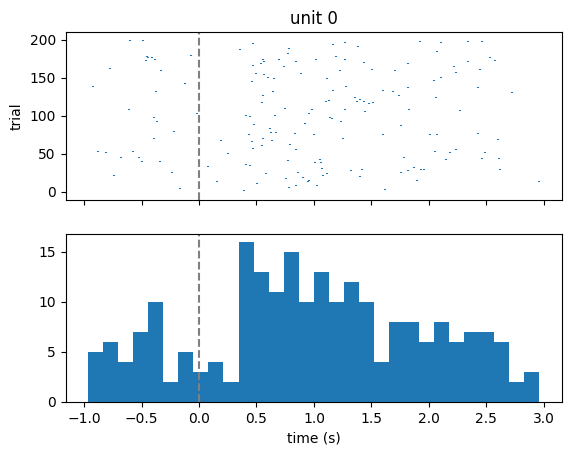

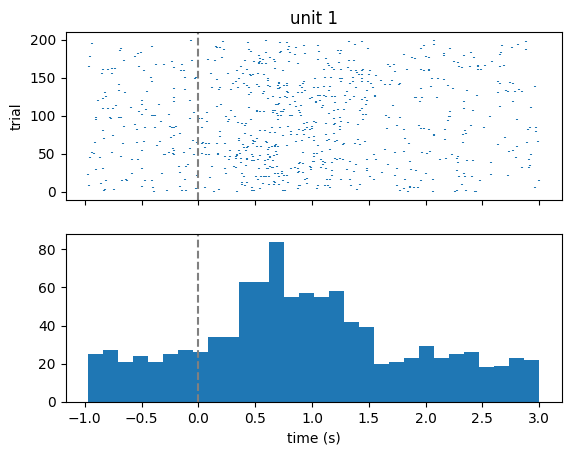

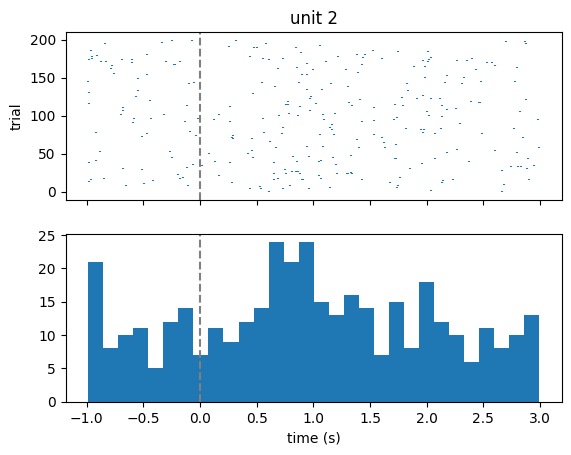

In [18]:
before = 1.0  # in seconds
after = 3.0

# Get the stimulus times for all stimuli
# get_timestamps() works whether the time is stored as an array of timestamps or as
# starting time and sampling rate.
stim_on_times = stimulus_presentation.get_timestamps()

for unit in range(3):
    unit_spike_times = nwbfile.units["spike_times"][unit]
    trial_spikes = []
    for time in stim_on_times:
        # Compute spike times relative to stimulus onset
        aligned_spikes = unit_spike_times - time
        # Keep only spike times in a given time window around the stimulus onset
        aligned_spikes = aligned_spikes[
            (-before < aligned_spikes) & (aligned_spikes < after)
        ]
        trial_spikes.append(aligned_spikes)
    fig, axs = plt.subplots(2, 1, sharex="all")
    plt.xlabel("time (s)")
    axs[0].eventplot(trial_spikes)

    axs[0].set_ylabel("trial")
    axs[0].set_title("unit {}".format(unit))
    axs[0].axvline(0, color=[0.5, 0.5, 0.5], linestyle='dashed')

    axs[1].hist(np.hstack(trial_spikes), 30)
    axs[1].axvline(0, color=[0.5, 0.5, 0.5], linestyle='dashed')

## Accessing trials
Trials are stored as `TimeIntervals` object which is a subclass of `DynamicTable`. `DynamicTable` objects are used to store metadata about each trial in a tabular form, where each row represents a trial and has a start time, stop time, and additional metadata.

You can find more information about trials and time intervals in the [pynwb time intervals Tutorial](https://pynwb.readthedocs.io/en/latest/tutorials/general/plot_timeintervals.html#time-intervals)

Similarly to `Units`, we can view trials as a pandas `DataFrame`.


In [19]:
trials_df = nwbfile.trials.to_dataframe()
trials_df.head()

,start_time,stop_time,stim_on_time,stim_off_time,delay1_time,delay2_time,stim_phase,stimCategory,category_name,external_image_file,new_old_labels_recog,response_value,response_time
id,,,,,,,,,,,,,
0,6821.208244,6826.937364,6821.208244,6822.210644,6822.711364,6826.937364,learn,5,smallAnimal,newolddelay\smallAnimal\7.jpg,NA,0.0,6825.934244
1,6827.084244,6830.582604,6827.084244,6828.079084,6828.579804,6830.582604,learn,4,phones,newolddelay\phones\34.jpg,NA,1.0,6829.579044
2,6830.675884,6833.647084,6830.675884,6831.674324,6832.175044,6833.647084,learn,2,landscapes,newolddelay\landscapes\31.jpg,NA,1.0,6832.644884
3,6833.779164,6837.162204,6833.779164,6834.778844,6835.279524,6837.162204,learn,3,mobility,newolddelay\mobility\30.jpg,NA,1.0,6836.166244
4,6837.301244,6840.487044,6837.301244,6838.304044,6838.804724,6840.487044,learn,3,mobility,newolddelay\mobility\13.jpg,NA,1.0,6839.487884


## Visualizing stimulus images by trial
The stimulus can be mapped one-to-one to each row (trial) of `trials` based on the ``stim_on_time`` column.



In [20]:
assert np.all(stimulus_presentation.timestamps[:] == trials_df.stim_on_time[:])

Here we will visualize the first 3 images that were categorized as landscapes in the session.

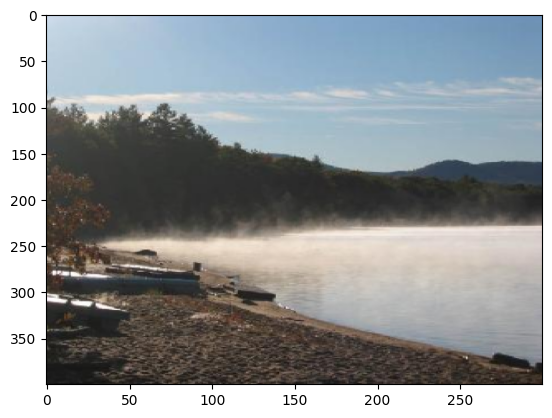

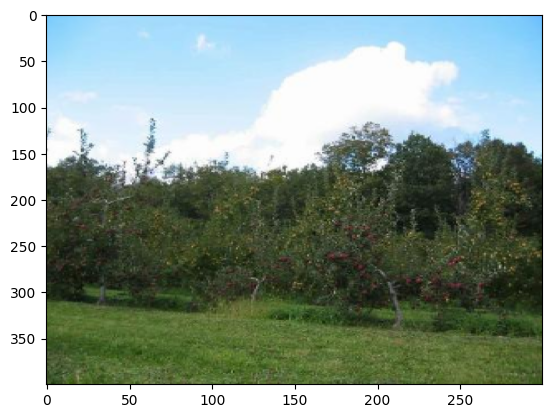

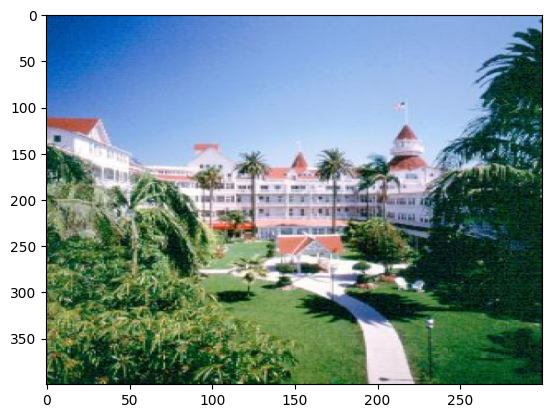

In [21]:
stim_on_times_landscapes = trials_df[
    trials_df.category_name == "landscapes"
].stim_on_time
for time in stim_on_times_landscapes.iloc[:3]:
    img = np.squeeze(
        stimulus_presentation.data[
            np.where(stimulus_presentation.timestamps[:] == time)
        ]
    )
    # Reverse the last dimension because the data were stored in BGR instead of RGB
    img = img[..., ::-1]
    plt.figure()
    plt.imshow(img, aspect="auto")

## Further exploration and visualization tools
So far we have explored the NWB file by inspecting at the `NWBFile` object and accessing its attributes, but it may be useful to explore the data in a
more interactive, visual way. See [Exploring NWB Files](https://nwb-overview.readthedocs.io/en/latest/tools/analysis_tools_home.html#analysistools-explore) in the analysis tool catalog for an updated list of programs for exploring NWB files.

# Streaming data

In some circumstances, you may want to work with very large NWB files or with subsets of data from an NWB file. Instead of downloading the full NWB file, another approach is to stream data directly from an archive. Streaming data allows you to read specific sections within individual data files directly from remote stores such as
[DANDI](https://dandiarchive.org/).

There are multiple methods to stream NWB files, we will focus on using `remfile` today but you can find additional options in the [pynwb streaming tutorial](https://pynwb.readthedocs.io/en/stable/tutorials/advanced_io/streaming.html)

## Getting the location of the file on DANDI
First, you will use the `DandiAPIClient` get the S3 URL of the NWB file stored on DANDI. Similarly to downloading the file, we can use the dandiset ID and the path of the file within that dataset to get this information.

In [22]:
dandiset_id = '000004'
filepath = 'sub-P11HMH/sub-P11HMH_ses-20061101_ecephys+image.nwb'
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

In [23]:
s3_url

'https://dandiarchive.s3.amazonaws.com/blobs/812/56f/81256f92-0a31-4b24-8c59-90a3a64e91b1'

## Using remfile to stream data
`remfile` is a library that enables indexing and streaming of files in s3. `remfile` is simple and fast, especially for the initial load of the nwb file and for accessing small pieces of data. The caveats of `remfile` are that it is a new project that has not been tested in a variety of use-cases and caching options are limited compared to other methods such as `fsspec`.

In [24]:
rem_file = remfile.File(s3_url)

file = h5py.File(rem_file, "r")
io_stream = NWBHDF5IO(file=file)
nwbfile_stream = io_stream.read()

You can see how we can still get a simplified interactive representation of the nwb file contents after streaming.

In [25]:
nwbfile_stream

root pynwb.file.NWBFile at 0x5719314832
Fields:
  acquisition: {
    events <class 'pynwb.misc.AnnotationSeries'>,
    experiment_ids <class 'pynwb.base.TimeSeries'>
  }
  data_collection: learning: 80, recognition: 81
  devices: {
    Neuralynx-cheetah <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    Neuralynx-cheetah-microwires-19 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-21 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-22 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-3 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-4 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-6 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-7 <class 'pynwb.ecephys.ElectrodeGroup'>,
    Neuralynx-cheetah-microwires-8 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: The data contained within this file describes a new/old recogntion task performed in patients with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human Medical Temporal Lobe (MTL).
  file_create_date: [datetime.datetime(2020, 5, 26, 19, 8, 31, 224415, tzinfo=tzoffset(None, -25200))]
  identifier: H11_9
  institution: Hunigton Memorial Hospital
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (7,), type "|O">
  lab: Rutishauser
  related_publications: ['Faraut et al. 2018, Scientific Data; Rutishauser et al. 2015, Nat Neurosci;']
  session_description: New/Old recognition task for ID: 9. 
  session_start_time: 2006-11-01 00:00:00-07:00
  stimulus: {
    StimulusPresentation <class 'pynwb.image.OpticalSeries'>
  }
  subject: subject pynwb.file.Subject at 0x5718750896
Fields:
  age: 16
  description: Right Lateral Frontal
  sex: M
  species: Human
  subject_id: P11HMH

  timestamps_reference_time: 2006-11-01 00:00:00-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

We can work with the data in the same way as downloading the full file, but now we will stream the data on demand as we need it.

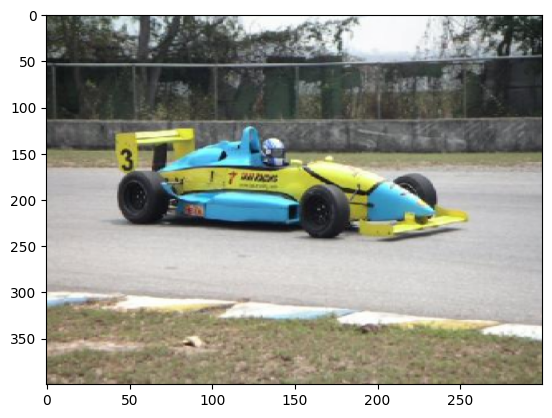

In [26]:
frame_index = 31
image = nwbfile_stream.stimulus['StimulusPresentation'].data[frame_index]
image = image[..., ::-1] # Reverse the last dimension because the data were stored in BGR instead of RGB
plt.imshow(image, aspect="auto")

## Closing the open NWB files
It is good practice to close any files that you have opened.



In [27]:
io.close()         # downloaded io object
io_stream.close()  # streaming io object